# Capstone Project 1 - Data Wrangling
## Name: Brock Nosbisch


# Load Data
## Importing Packages, Reading CSV, Reordering Columns in DF

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = 'cs-training.csv'
col_names = ['id', 'serious_delinquent', 'unsecured_lines', 'age', 'past_due_30_59', 'debt_ratio', 'monthly_income', 
            'open_credit_lines', 'past_due_90_plus', 'real_estate_loans', 'past_due_60_89', 'number_of_dependents']

# Read in the file with new column names.
df = pd.read_csv(file_name, header=0, names=col_names, na_values='-1')
df.set_index('id', inplace=True)

# Reorder columns
new_col_ordering = [ 'age', 'debt_ratio', 'monthly_income', 
            'open_credit_lines', 'past_due_30_59', 'past_due_60_89', 'past_due_90_plus', 'serious_delinquent',
             'unsecured_lines', 'real_estate_loans', 'number_of_dependents']
df = df[new_col_ordering]





# Review DataFrame Details


A few initial findings:  
* 2 of the fields contain null values.
* The minimum age is 0.
* The past due maximum values seem off since the dataset is only for 24 months.

In [329]:
df.info()
print('')
print('')

print(df.describe())
print(df.head(15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
age                     150000 non-null int64
debt_ratio              150000 non-null float64
monthly_income          120269 non-null float64
open_credit_lines       150000 non-null int64
past_due_30_59          150000 non-null int64
past_due_60_89          150000 non-null int64
past_due_90_plus        150000 non-null int64
serious_delinquent      150000 non-null int64
unsecured_lines         150000 non-null float64
real_estate_loans       150000 non-null int64
number_of_dependents    146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


                 age     debt_ratio  monthly_income  open_credit_lines  \
count  150000.000000  150000.000000    1.202690e+05      150000.000000   
mean       52.295207     353.005076    6.670221e+03           8.452760   
std        14.771866    2037.818523    1.438467e+04           5.145951   
min         0.000000      

## Person experienced 90 days past due delinquency or worse 
 There are only 2 distinct values and both are valid.

In [330]:

print(df['serious_delinquent'].value_counts().to_frame().reset_index().sort_values('serious_delinquent', ascending=False))


   index  serious_delinquent
0      0              139974
1      1               10026


## Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.
The higher the amount, the worse a person is.

In [331]:

print('Top 5')
print(df['unsecured_lines'].value_counts().to_frame().reset_index().sort_values('index', ascending=False).head(5))
print('')
print('Bottom 5')
print(df['unsecured_lines'].value_counts().to_frame().reset_index().sort_values('index', ascending=False).tail(5))


Top 5
          index  unsecured_lines
38807   50708.0                1
107425  29110.0                1
112115  22198.0                1
113030  22000.0                1
106240  20514.0                1

Bottom 5
           index  unsecured_lines
104642  0.000014                1
91171   0.000013                1
108487  0.000010                1
108764  0.000008                1
0       0.000000            10878


## Age of borrower in years

In [332]:

print('Youngest')
print('*The person with an Age of 0 must be bad data.  Will need to exclude this person')

print(df['age'].value_counts().to_frame().reset_index().sort_values('index', ascending=True).head(5))
print('')
print('Oldest')
print(df['age'].value_counts().to_frame().reset_index().sort_values('index', ascending=True).tail(5))


Youngest
*The person with an Age of 0 must be bad data.  Will need to exclude this person
    index  age
85      0    1
69     21  183
63     22  434
59     23  641
56     24  816

Oldest
    index  age
80    102    3
79    103    3
84    105    1
83    107    1
82    109    2


## Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
Need to clean up data for borrowers with 90+ times.

In [333]:


print(df['past_due_30_59'].value_counts().to_frame().reset_index().sort_values('index', ascending=False))

    index  past_due_30_59
6      98             264
11     96               5
14     13               1
13     12               2
15     11               1
12     10               4
10      9              12
9       8              25
8       7              54
7       6             140
5       5             342
4       4             747
3       3            1754
2       2            4598
1       1           16033
0       0          126018


## Monthly debt payments, alimony, living costs divided by monthy gross income
There are a lot of high Debt Ratios because we do not have Monthly Income data.

Need to figure out what to exclude.

In [334]:

print('')
print('Top 5')
print(df['debt_ratio'].value_counts().to_frame().reset_index().sort_values('debt_ratio', ascending=False).head(5))
print('')
print('Bottom 5')
print(df['debt_ratio'].value_counts().to_frame().reset_index().sort_values('debt_ratio', ascending=False).tail(5))
print('')
print('Minimum Value')
print(df['debt_ratio'].value_counts().to_frame().reset_index().sort_values('index', ascending=True).head(5))
print('')
print('Maximum Value')
print(df['debt_ratio'].value_counts().to_frame().reset_index().sort_values('index', ascending=True).tail(5))



Top 5
   index  debt_ratio
0    0.0        4113
1    1.0         229
2    4.0         174
3    2.0         170
4    3.0         162

Bottom 5
           index  debt_ratio
44732   0.388592           1
44731   0.076564           1
44730   0.648382           1
44729   0.115146           1
114193  0.656276           1

Minimum Value
           index  debt_ratio
0       0.000000        4113
73558   0.000026           1
106536  0.000037           1
79450   0.000039           1
106251  0.000066           1

Maximum Value
          index  debt_ratio
93903  168835.0           1
32221  220516.0           1
30212  307001.0           1
94692  326442.0           1
65434  329664.0           1


## Monthly Income

As seen in df.info, confirming there are null values.
id
7    NaN
9    NaN
17   NaN
33   NaN
42   NaN
Name: monthly_income, dtype: float64

Top 5 Counts
    index  monthly_income
0  5000.0            2757
1  4000.0            2106
2  6000.0            1934
3  3000.0            1758
4     0.0            1634

Bottom 5 Counts
         index  monthly_income
10827     21.0               1
10828   9835.0               1
10829  21505.0               1
10830  10753.0               1
13593   1037.0               1

Minimum Monthly Income
       index  monthly_income
4        0.0            1634
17       1.0             605
2523     2.0               6
7580     4.0               2
8769     5.0               2
12364    7.0               1
12139    9.0               1
7354    10.0               2
12023   11.0               1
11317   15.0               1

Maximum Monthly Income
           index  monthly_income
11964  3008750.0               1
13361  1794060.0               1
11439  1560100.0      

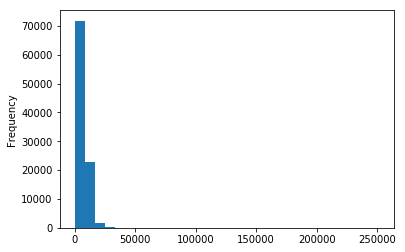


Plot only values < 50000 into bins of 30
I chose other values as well but 50k seems okay.


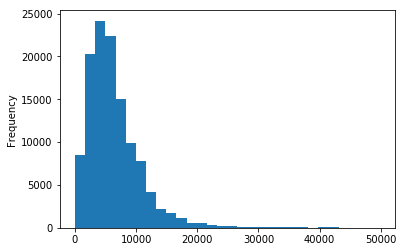


Plot only values < 50000 into bins of 100
I chose other values as well but 50k seems okay.


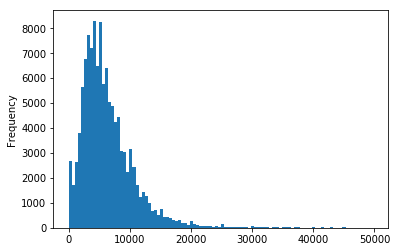


Box Plot for < 50000


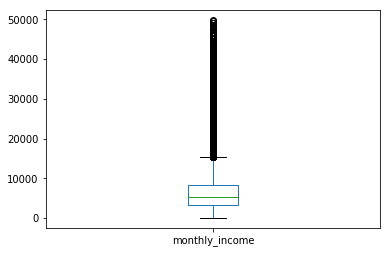

In [335]:
print('As seen in df.info, confirming there are null values.')
print(df['monthly_income'][df['monthly_income'].isna()].head(5))
print('')
print('Top 5 Counts')
print(df['monthly_income'].value_counts().to_frame().reset_index().sort_values('monthly_income', ascending=False).head(5))
print('')
print('Bottom 5 Counts')
print(df['monthly_income'].value_counts().to_frame().reset_index().sort_values('monthly_income', ascending=False).tail(5))
print('')
print('Minimum Monthly Income')
print(df['monthly_income'].value_counts().to_frame().reset_index().sort_values('index', ascending=True).head(10))
print('')
print('Maximum Monthly Income')
print(df['monthly_income'].value_counts().to_frame().reset_index().sort_values('index', ascending=False).head(10))

print()
print()
print('STD, MEAN, MEDIAN')
print(df['monthly_income'].std())
print(df['monthly_income'].mean())
print(df['monthly_income'].median())

print('')
print('')
print('Review Monthly Income in Histogram')
df['monthly_income'][df['monthly_income']].plot(kind='hist', bins=30)

print('')
print('Look at high values because they are causing severe outliers.')
print('My initial thinking is that we can exclude all with a high income.')
plt.show()
print('')
print('Plot only values < 50000 into bins of 30')
print('I chose other values as well but 50k seems okay.')
df['monthly_income'][df['monthly_income'] < 50000].plot(kind='hist', bins=30)
plt.show()

print('')
print('Plot only values < 50000 into bins of 100')
print('I chose other values as well but 50k seems okay.')
df['monthly_income'][df['monthly_income'] < 50000].reindex().plot(kind='hist', bins=100)
plt.show()

print('')
print('Box Plot for < 50000')
df['monthly_income'][df['monthly_income'] < 50000].plot(kind='box')
plt.show()





## Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

In [336]:

print('Top 5 Count')
print(df['open_credit_lines'].value_counts().to_frame().reset_index().sort_values('open_credit_lines', ascending=False).head(5))
print('')
print('Bottom 5 Count')
print(df['open_credit_lines'].value_counts().to_frame().reset_index().sort_values('open_credit_lines', ascending=False).tail(5))
print('')
print('Minimum Value')
print(df['open_credit_lines'].value_counts().to_frame().reset_index().sort_values('index', ascending=True).head(10))
print('')
print('Maximum Value')
print(df['open_credit_lines'].value_counts().to_frame().reset_index().sort_values('index', ascending=False).head(10))






Top 5 Count
   index  open_credit_lines
0      6              13614
1      7              13245
2      5              12931
3      8              12562
4      4              11609

Bottom 5 Count
    index  open_credit_lines
53     50                  2
54     47                  2
55     44                  2
56     53                  1
57     58                  1

Minimum Value
    index  open_credit_lines
17      0               1888
13      1               4438
10      2               6666
7       3               9058
4       4              11609
2       5              12931
0       6              13614
1       7              13245
3       8              12562
5       9              11355

Maximum Value
    index  open_credit_lines
57     58                  1
52     57                  2
51     56                  2
46     54                  4
56     53                  1
49     52                  3
50     51                  2
53     50                  2
47     49           

## Number of times borrower has been 90 days or more past due.

In [337]:


print('Top 5 Count')
print(df['past_due_90_plus'].value_counts().to_frame().reset_index().sort_values('past_due_90_plus', ascending=False).head(5))
print('')
print('Bottom 5 Count')
print(df['past_due_90_plus'].value_counts().to_frame().reset_index().sort_values('past_due_90_plus', ascending=False).tail(5))
print('')
print('Minimum Value')
print(df['past_due_90_plus'].value_counts().to_frame().reset_index().sort_values('index', ascending=True).head(10))
print('')
print('Maximum Value')
print(df['past_due_90_plus'].value_counts().to_frame().reset_index().sort_values('index', ascending=False).head(10))






Top 5 Count
   index  past_due_90_plus
0      0            141662
1      1              5243
2      2              1555
3      3               667
4      4               291

Bottom 5 Count
    index  past_due_90_plus
14     13                 4
15     12                 2
16     14                 2
17     15                 2
18     17                 1

Minimum Value
    index  past_due_90_plus
0       0            141662
1       1              5243
2       2              1555
3       3               667
4       4               291
6       5               131
7       6                80
8       7                38
9       8                21
10      9                19

Maximum Value
    index  past_due_90_plus
5      98               264
13     96                 5
18     17                 1
17     15                 2
16     14                 2
14     13                 4
15     12                 2
12     11                 5
11     10                 8
10      9               

## Number of mortgage and real estate loans including home equity lines of credit

In [338]:

print('Top 5 Count')
print(df['real_estate_loans'].value_counts().to_frame().reset_index().sort_values('real_estate_loans', ascending=False).head(5))
print('')
print('Bottom 5 Count')
print(df['real_estate_loans'].value_counts().to_frame().reset_index().sort_values('real_estate_loans', ascending=False).tail(5))
print('')
print('Minimum Value')
print(df['real_estate_loans'].value_counts().to_frame().reset_index().sort_values('index', ascending=True).head(10))
print('')
print('Maximum Value')
print(df['real_estate_loans'].value_counts().to_frame().reset_index().sort_values('index', ascending=False).head(10))






Top 5 Count
   index  real_estate_loans
0      0              56188
1      1              52338
2      2              31522
3      3               6300
4      4               2170

Bottom 5 Count
    index  real_estate_loans
23     32                  1
24     21                  1
25     26                  1
26     29                  1
27     54                  1

Minimum Value
   index  real_estate_loans
0      0              56188
1      1              52338
2      2              31522
3      3               6300
4      4               2170
5      5                689
6      6                320
7      7                171
8      8                 93
9      9                 78

Maximum Value
    index  real_estate_loans
27     54                  1
23     32                  1
26     29                  1
25     26                  1
18     25                  3
22     23                  2
24     21                  1
21     20                  2
20     19                  2
19

## Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

In [339]:


print('Top 5 Count')
print(df['past_due_60_89'].value_counts().to_frame().reset_index().sort_values('past_due_60_89', ascending=False).head(5))
print('')
print('Bottom 5 Count')
print(df['past_due_60_89'].value_counts().to_frame().reset_index().sort_values('past_due_60_89', ascending=False).tail(5))
print('')
print('Minimum Value')
print(df['past_due_60_89'].value_counts().to_frame().reset_index().sort_values('index', ascending=True).head(10))
print('')
print('Maximum Value')
print(df['past_due_60_89'].value_counts().to_frame().reset_index().sort_values('index', ascending=False).head(10))






Top 5 Count
   index  past_due_60_89
0      0          142396
1      1            5731
2      2            1118
3      3             318
4     98             264

Bottom 5 Count
    index  past_due_60_89
8       7               9
9      96               5
10      8               2
11     11               1
12      9               1

Minimum Value
    index  past_due_60_89
0       0          142396
1       1            5731
2       2            1118
3       3             318
5       4             105
6       5              34
7       6              16
8       7               9
10      8               2
12      9               1

Maximum Value
    index  past_due_60_89
4      98             264
9      96               5
11     11               1
12      9               1
10      8               2
8       7               9
7       6              16
6       5              34
5       4             105
3       3             318


## Number of dependents in family excluding themselves (spouse, children etc.)

In [340]:

print('Top 5 Count')
print(df['number_of_dependents'].value_counts().to_frame().reset_index().sort_values('number_of_dependents', ascending=False).head(5))
print('')
print('Bottom 5 Count')
print(df['number_of_dependents'].value_counts().to_frame().reset_index().sort_values('number_of_dependents', ascending=False).tail(5))
print('')
print('Minimum Value')
print(df['number_of_dependents'].value_counts().to_frame().reset_index().sort_values('index', ascending=True).head(10))
print('')
print('Maximum Value')
print(df['number_of_dependents'].value_counts().to_frame().reset_index().sort_values('index', ascending=False).head(10))






Top 5 Count
   index  number_of_dependents
0    0.0                 86902
1    1.0                 26316
2    2.0                 19522
3    3.0                  9483
4    4.0                  2862

Bottom 5 Count
    index  number_of_dependents
8     8.0                    24
9     9.0                     5
10   10.0                     5
11   13.0                     1
12   20.0                     1

Minimum Value
   index  number_of_dependents
0    0.0                 86902
1    1.0                 26316
2    2.0                 19522
3    3.0                  9483
4    4.0                  2862
5    5.0                   746
6    6.0                   158
7    7.0                    51
8    8.0                    24
9    9.0                     5

Maximum Value
    index  number_of_dependents
12   20.0                     1
11   13.0                     1
10   10.0                     5
9     9.0                     5
8     8.0                    24
7     7.0                    51

# Cleaning Data

In [341]:
print('Exclude Record(s) that have an Age of 0.')
df = (df[df['age'] != 0])
print()
print('Any records in df where age = 0? (Empty DataFrame means No)')
print(df[df['age'] == 0])


Exclude Record(s) that have an Age of 0.

Any records in df where age = 0? (Empty DataFrame means No)
Empty DataFrame
Columns: [age, debt_ratio, monthly_income, open_credit_lines, past_due_30_59, past_due_60_89, past_due_90_plus, serious_delinquent, unsecured_lines, real_estate_loans, number_of_dependents]
Index: []


In [342]:

print('Exclude Records where Monthly Income is null since I am not sure if this is bad data or should be 0.')
df = (df[df['monthly_income'].notnull()])
print()
print('Confirm the NULL Monthly Income values are no longer in the df. (ie id = 7)')
print(df.head(10))


Exclude Records where Monthly Income is null since I am not sure if this is bad data or should be 0.

Confirm the NULL Monthly Income values are no longer in the df. (ie id = 7)
    age  debt_ratio  monthly_income  open_credit_lines  past_due_30_59  \
id                                                                       
1    45    0.802982          9120.0                 13               2   
2    40    0.121876          2600.0                  4               0   
3    38    0.085113          3042.0                  2               1   
4    30    0.036050          3300.0                  5               0   
5    49    0.024926         63588.0                  7               1   
6    74    0.375607          3500.0                  3               0   
8    39    0.209940          3500.0                  8               0   
10   57    0.606291         23684.0                  9               0   
11   30    0.309476          2500.0                  5               0   
12   51 

In [343]:
print('Update Number of Dependents column to 0 for those that are NULL.')
print('I went to do this but there are no more NAs as they were all removed when excluding')
print('the Monthly Income where NULL.')




Update Number of Dependents column to 0 for those that are NULL.
I went to do this but there are no more NAs as they were all removed when excluding
the Monthly Income where NULL.


In [344]:
print('Create Monthly Income Buckets (may need to adjust later)')
print('Buckets are:')
print('1 = 0-499; 2 = 500-999; 3 = 1000-2499;')
print('4 = 2500-4999; 5 = 5000-7499; 6 = 7500-9999;')
print('7 = 10000-24999; 8 = 25000-49999; 9 = 50000+')
# Create income buckets
df.loc[df['monthly_income'] >=0, 'monthly_income_bucket'] = 1
df.loc[df['monthly_income'] >=500, 'monthly_income_bucket'] = 2
df.loc[df['monthly_income'] >=1000, 'monthly_income_bucket'] = 3
df.loc[df['monthly_income'] >=2500, 'monthly_income_bucket'] = 4
df.loc[df['monthly_income'] >=5000, 'monthly_income_bucket'] = 5
df.loc[df['monthly_income'] >=7500, 'monthly_income_bucket'] = 6
df.loc[df['monthly_income'] >=10000, 'monthly_income_bucket'] = 7
df.loc[df['monthly_income'] >=25000, 'monthly_income_bucket'] = 8
df.loc[df['monthly_income'] >=50000, 'monthly_income_bucket'] = 9

print()
print('Verify the new column was added and is populating correctly.')
print(df[['monthly_income','monthly_income_bucket']].head(10))


Create Monthly Income Buckets (may need to adjust later)
Buckets are:
1 = 0-499; 2 = 500-999; 3 = 1000-2499;
4 = 2500-4999; 5 = 5000-7499; 6 = 7500-9999;
7 = 10000-24999; 8 = 25000-49999; 9 = 50000+

Verify the new column was added and is populating correctly.
    monthly_income  monthly_income_bucket
id                                       
1           9120.0                    6.0
2           2600.0                    4.0
3           3042.0                    4.0
4           3300.0                    4.0
5          63588.0                    9.0
6           3500.0                    4.0
8           3500.0                    4.0
10         23684.0                    7.0
11          2500.0                    4.0
12          6501.0                    5.0


In [345]:
print('Remove records where the 30-59, 60-89, or 90+ past due buckets')
print()
print(df['past_due_90_plus'].value_counts().to_frame().reset_index().sort_values('index', ascending=False).head(5))
print()
print('We need to remove the 98 and 96 values from these 3 fields:')
print('    past_due_30_59, past_due_60_89, past_due_90_plus')
print()
print('I will be excluding any number above 24 in case there are other bad values later on.')
df = (df[df['past_due_30_59'] <= 24])
df = (df[df['past_due_60_89'] <= 24])
df = (df[df['past_due_90_plus'] <= 24])
print()
print('Confirm that no number above 24 is in the data:')
print(df['past_due_90_plus'].value_counts().to_frame().reset_index().sort_values('index', ascending=False).head(5))




Remove records where the 30-59, 60-89, or 90+ past due buckets

    index  past_due_90_plus
5      98               144
13     96                 4
18     17                 1
17     15                 2
16     14                 2

We need to remove the 98 and 96 values from these 3 fields:
    past_due_30_59, past_due_60_89, past_due_90_plus

I will be excluding any number above 24 in case there are other bad values later on.

Confirm that no number above 24 is in the data:
    index  past_due_90_plus
16     17                 1
13     15                 2
15     14                 2
12     13                 4
14     12                 2


In [346]:
print('Convert float to int64 where no decimals are needed.')
df = df.astype({'monthly_income_bucket':'int64', 'monthly_income':'int64', 'number_of_dependents':'int64' })
print(df.info())



Convert float to int64 where no decimals are needed.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120120 entries, 1 to 150000
Data columns (total 12 columns):
age                      120120 non-null int64
debt_ratio               120120 non-null float64
monthly_income           120120 non-null int64
open_credit_lines        120120 non-null int64
past_due_30_59           120120 non-null int64
past_due_60_89           120120 non-null int64
past_due_90_plus         120120 non-null int64
serious_delinquent       120120 non-null int64
unsecured_lines          120120 non-null float64
real_estate_loans        120120 non-null int64
number_of_dependents     120120 non-null int64
monthly_income_bucket    120120 non-null int64
dtypes: float64(2), int64(10)
memory usage: 11.9 MB
None


In [348]:
print('Final DataFrame Columns:')
print(df.columns)
print()
print('DF Info:')
print(df.info())
print()
print('DF Describe:')
print(df.describe())
print()
print('Sample Data:')
print(df.head(10))

Final DataFrame Columns:
Index(['age', 'debt_ratio', 'monthly_income', 'open_credit_lines',
       'past_due_30_59', 'past_due_60_89', 'past_due_90_plus',
       'serious_delinquent', 'unsecured_lines', 'real_estate_loans',
       'number_of_dependents', 'monthly_income_bucket'],
      dtype='object')

DF Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120120 entries, 1 to 150000
Data columns (total 12 columns):
age                      120120 non-null int64
debt_ratio               120120 non-null float64
monthly_income           120120 non-null int64
open_credit_lines        120120 non-null int64
past_due_30_59           120120 non-null int64
past_due_60_89           120120 non-null int64
past_due_90_plus         120120 non-null int64
serious_delinquent       120120 non-null int64
unsecured_lines          120120 non-null float64
real_estate_loans        120120 non-null int64
number_of_dependents     120120 non-null int64
monthly_income_bucket    120120 non-null int64
dtypes: 